# imports

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale,resize

# W&B Integration
import sys
sys.path.insert(0, '../..')
from utils.wandb_utils import init_wandb
import wandb

# Initialize run
run = init_wandb(
    name="02_02_convolutions",
    project="generative-deep-learning",
    config={"description": "Manual convolution operations with NumPy"}
)

2025-12-27 16:00:09.409262: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cataluna84/Workspace-Antigravity/Generative_Deep_Learning/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
wandb: Currently logged in as: cataluna84 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


# original image input

(64, 64)


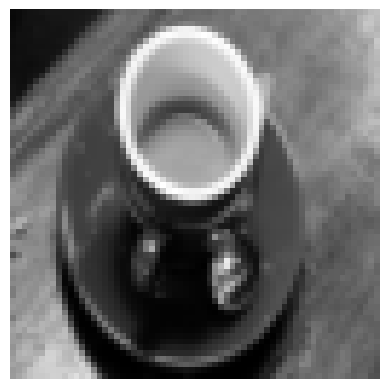

In [2]:
im = rgb2gray(data.coffee())
im = resize(im, (64,64))
print(im.shape)

plt.axis('off')
plt.imshow(im, cmap = 'gray');


wandb.log({"original_image": wandb.Image(im, caption="Original Grayscale")})

# horizontal edge filter

wandb: WARNING Data passed to `wandb.Image` should consist of values in the range [0, 255], image data will be normalized to this range, but behavior will be removed in a future version of wandb.


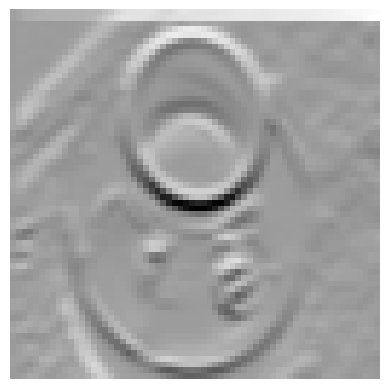

In [3]:
filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

wandb.log({"horizontal_edge": wandb.Image(new_image, caption="Horizontal Edge Filter")})

# vertical edge filter

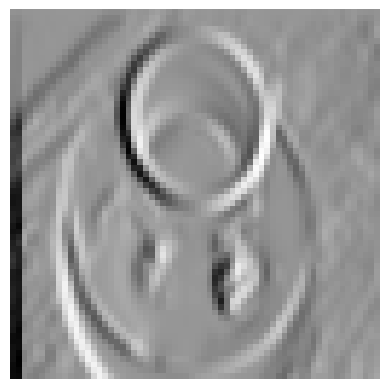

In [4]:
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im,1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

wandb.log({"vertical_edge": wandb.Image(new_image, caption="Vertical Edge Filter")})

# horizontal edge filter with stride 2

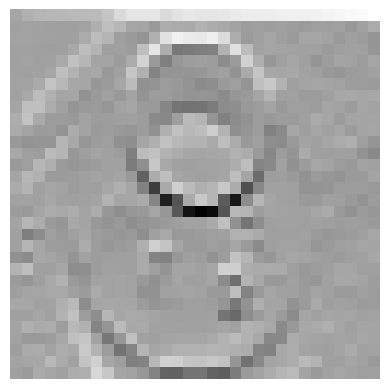

In [5]:
filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

wandb.log({"horizontal_stride_2": wandb.Image(new_image, caption="Horizontal Edge (Stride 2)")})

# vertical edge filter with stride 2

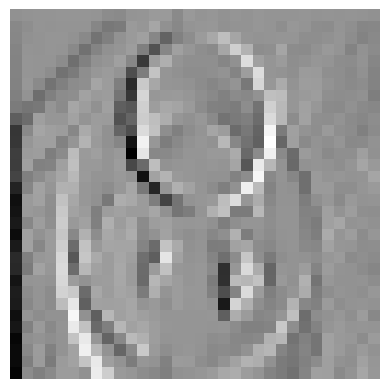

In [6]:
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

wandb.log({"vertical_stride_2": wandb.Image(new_image, caption="Vertical Edge (Stride 2)")})

In [7]:
# Finish W&B run
wandb.finish()